# Unveiling the Android App Market: 
## Analyzing Google Play Store Data

### 1. Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load datasets
apps = pd.read_csv("apps.csv")
reviews = pd.read_csv("user_reviews.csv")

In [3]:
# Inspect basic structure
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None


In [4]:
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB
None


In [5]:
# Remove duplicates
apps.drop_duplicates(inplace=True)
reviews.drop_duplicates(inplace=True)

In [6]:
# Clean numeric columns
apps['Installs'] = apps['Installs'].replace('[+,]', '', regex=True)
apps['Installs'] = pd.to_numeric(apps['Installs'], errors='coerce')

apps['Price'] = apps['Price'].replace('$', '', regex=True)
apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce')

apps['Rating'] = pd.to_numeric(apps['Rating'], errors='coerce')
apps['Size'] = apps['Size'].replace('M', '').replace('Varies with device', np.nan)
apps['Size'] = pd.to_numeric(apps['Size'], errors='coerce')


In [7]:
# Handle missing values
apps['Rating'].fillna(apps.groupby('Category')['Rating'].transform('median'), inplace=True)
apps.dropna(subset=['Category', 'Installs'], inplace=True)

C:\Users\Ayush Chandra Shivha\AppData\Local\Temp\ipykernel_2652\2805292777.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps['Rating'].fillna(apps.groupby('Category')['Rating'].transform('median'), inplace=True)


### 2. Category Exploration

In [8]:
import matplotlib.pyplot as plt

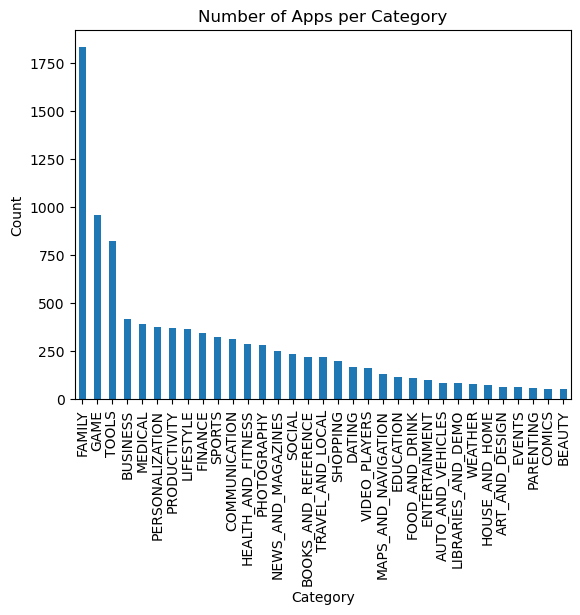

In [9]:
# App distribution by category
category_counts = apps['Category'].value_counts()

plt.figure()
category_counts.plot(kind='bar')
plt.title("Number of Apps per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

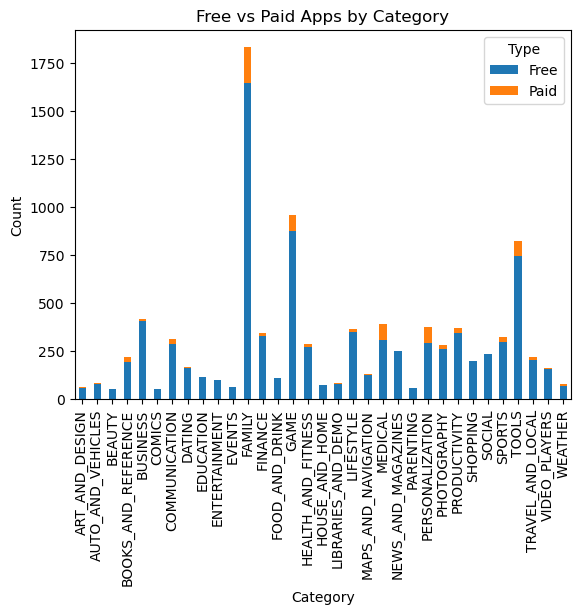

In [10]:
# Free vs Paid distribution
apps['Type'] = apps['Type'].fillna('Free')
type_dist = apps.groupby(['Category', 'Type']).size().unstack()

type_dist.plot(kind='bar', stacked=True)
plt.title("Free vs Paid Apps by Category")
plt.ylabel("Count")
plt.show()

### 3. Metrics Analysis

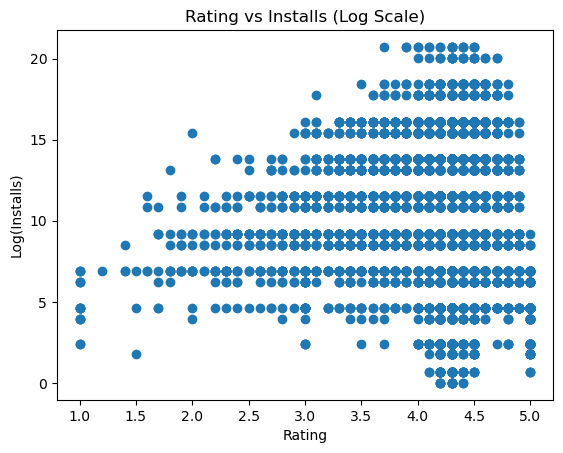

In [11]:
# Rating vs Installs
plt.figure()
plt.scatter(apps['Rating'], np.log1p(apps['Installs']))
plt.title("Rating vs Installs (Log Scale)")
plt.xlabel("Rating")
plt.ylabel("Log(Installs)")
plt.show()

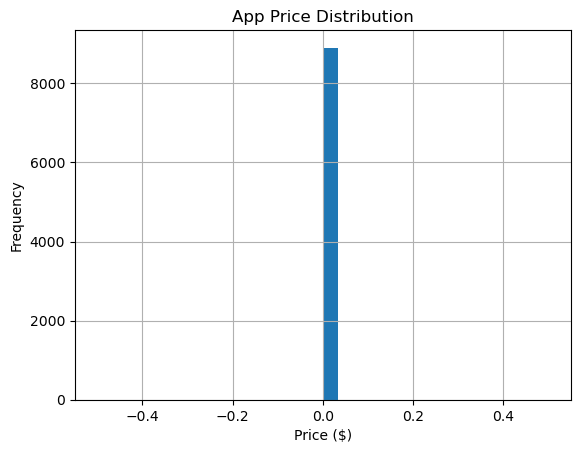

In [12]:
# Price distribution
plt.figure()
apps['Price'].hist(bins=30)
plt.title("App Price Distribution")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

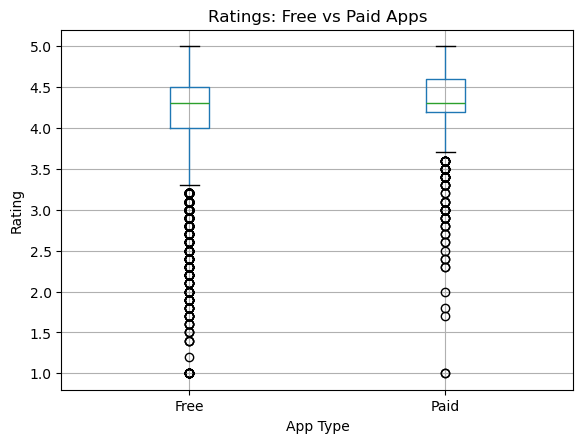

In [13]:
# Free vs Paid ratings
apps.boxplot(column='Rating', by='Type')
plt.title("Ratings: Free vs Paid Apps")
plt.suptitle("")
plt.xlabel("App Type")
plt.ylabel("Rating")
plt.show()

### 4. Sentiment Analysis (User Reviews)

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Ayush
[nltk_data]     Chandra Shivha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [16]:
# Compute sentiment score
reviews['SentimentScore'] = reviews['Translated_Review'].astype(str).apply(
    lambda x: sia.polarity_scores(x)['compound']
)

In [17]:
# Categorize sentiment
reviews['Sentiment'] = reviews['SentimentScore'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

In [18]:
# Aggregate sentiment per app
sentiment_summary = reviews.groupby('App')['SentimentScore'].mean().reset_index()

### 5. Interactive Visualization (Plotly)

In [19]:
import plotly.express as px

# Interactive scatter plot
fig = px.scatter(
    apps,
    x='Rating',
    y='Installs',
    color='Category',
    size='Installs',
    hover_name='App',
    title='Interactive Rating vs Installs'
)
fig.show()

In [20]:
# Interactive category distribution
fig2 = px.bar(
    category_counts,
    title="Interactive App Distribution by Category"
)
fig2.show()

### 6. Visualization Best Practices Integration

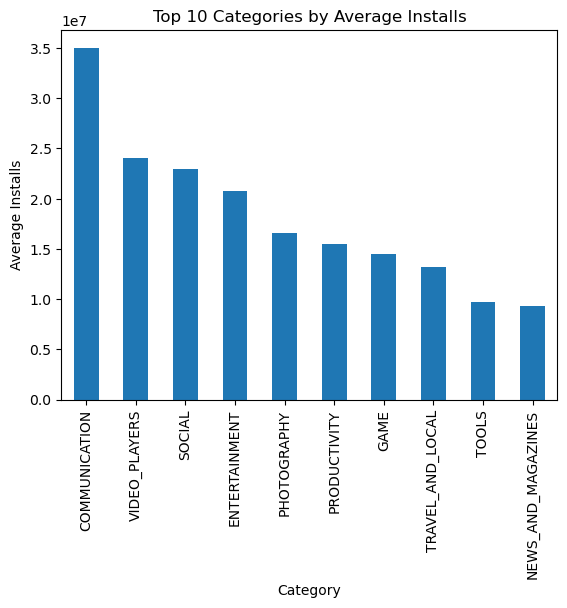

In [21]:
# Clear, focused visualization with annotations
top_categories = apps.groupby('Category')['Installs'].mean().sort_values(ascending=False).head(10)

plt.figure()
top_categories.plot(kind='bar')
plt.title("Top 10 Categories by Average Installs")
plt.xlabel("Category")
plt.ylabel("Average Installs")
plt.show()

# Completed